<a href="https://colab.research.google.com/github/cotozelo/Data_Science_Machine_Learning_-_Data_ICMC/blob/main/Notebooks/Classificacao_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes
Esse notebook tem inspiração na <a href='https://www.youtube.com/watch?v=8ZqsODxehO4&list=PLFE-LjWAAP9R4G0WOXWuha4P5cCvw7hGB&index=4'>Aula 03</a>. A aula mostrou a teoria probabilistica, aqui tentamos aplicar em problemas de classificação.
O Naive Bayes faz uma classificação baseada em probabilidades, ou seja, é calculada a probabilidade da nova amostra estar em cada uma das classes, e é rotulada a classe que obtiver maior probabilidade.

## imports

In [56]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

import pandas as pd
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Essas linhas sao apenas configuracoes de plotting. 
# Elas nao sao importantes para o seu aprendizado, entao as trataremos como "magica" por agora, ok?
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Abaixo encontram-se os hiperparametros do modelo que sera construido.
# A nao ser que seja instruido, voce nao deve modifica-los
TRAIN_TEST_SPLIT_SIZE = 0.2 # Define que o TESTE correspondera a 20% do total do dataset
SEED_RANDOM=13051980

In [93]:
def plot_fronteiras(features, target, x_label, y_label):
  plt.figure(figsize=(8,5))

  modelo = GaussianNB()
  modelo.fit(features, target)

  plot_decision_regions(features, target, clf=modelo, legend=2)

  # Adding axes annotations
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title('Fronteira do Naive Bayes')
  plt.show()

## Exemplo mnis

### Dataset


O dataset possui 1797  imagens.


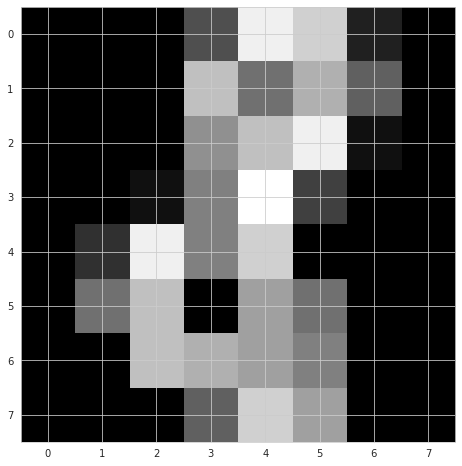

In [14]:
dataset = datasets.load_digits()

datasetSize = len(dataset.images)
print("O dataset possui", datasetSize, " imagens.")

# Mostraremos uma imagem aleatoria dentro do dataset
plt.imshow(dataset.images[np.random.randint(datasetSize)])
plt.show()

### Separando o datasete em treino e teste

In [15]:
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=TRAIN_TEST_SPLIT_SIZE, random_state=SEED_RANDOM)

print("Train shapes - X =", X_train.shape," y =", y_train.shape)
print("Test shapes - X =", X_test.shape," y =", y_test.shape)
print()
print(f"Exemplo de uma linha de X:\n{X_train[0]}\n")
print(f"Exemplo de uma linha de Y:\n{y_train[0]}")

Train shapes - X = (1437, 64)  y = (1437,)
Test shapes - X = (360, 64)  y = (360,)

Exemplo de uma linha de X:
[ 0.  0.  2. 12. 14.  8.  0.  0.  0.  0. 13. 13. 15. 12.  0.  0.  0.  5.
 15.  2. 10.  6.  0.  0.  0.  2. 14. 13. 14.  1.  0.  0.  0.  0.  0. 11.
 15. 13.  1.  0.  0.  0.  1. 15.  3. 14.  7.  0.  0.  0.  6. 13.  1. 16.
  4.  0.  0.  0.  1. 12. 16. 11.  0.  0.]

Exemplo de uma linha de Y:
8


### O Modelo

In [16]:
modelo = GaussianNB()
modelo.fit(X_train, y_train)
modelo

GaussianNB(priors=None, var_smoothing=1e-09)

O score do modelo é 0.8416666666666667


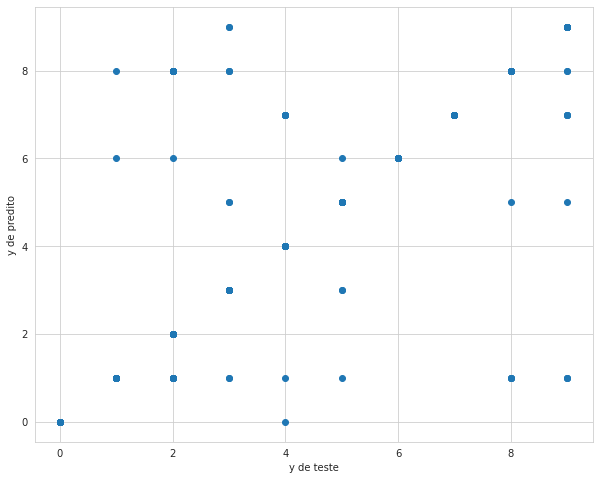

In [21]:
score = modelo.score(X_test, y_test)
y_predito = modelo.predict(X_test)
print(f'O score do modelo é {score}')
plt.scatter(x=y_test, y=y_predito)
plt.xlabel("y de teste")
plt.ylabel("y de predito")
plt.show()

Podemos comprar esse resultado com o obtido pelo classificador <a href='https://github.com/cotozelo/Data_Science_Machine_Learning_-_Data_ICMC/blob/main/Notebooks/Classificacao_KNN.ipynb'>KNN</a>, e constamos que o kNN obtete um score de 0.98, ou seja, muito melhor que o Naive Bayes que obteve 0.84.


### Métricas

In [25]:
print(metrics.classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       0.69      0.95      0.80        42
           2       1.00      0.46      0.63        35
           3       0.91      0.69      0.78        29
           4       1.00      0.81      0.89        42
           5       0.91      0.91      0.91        43
           6       0.93      1.00      0.97        43
           7       0.77      1.00      0.87        33
           8       0.59      0.83      0.69        29
           9       0.89      0.62      0.73        26

    accuracy                           0.84       360
   macro avg       0.87      0.83      0.82       360
weighted avg       0.87      0.84      0.84       360



## Exemplo Iris

###Dataset


In [69]:
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['class'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [89]:
X = df_iris.iloc[:, :-1].values
y = df_iris.iloc[:, 4].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_SPLIT_SIZE, random_state=SEED_RANDOM)

print(f'Tamanhos do X de treino {X_train.shape}')
print(f'Tamanhos do y de treino {y_train.shape}')

print(f'Tamanhos do X de teste {X_test.shape}')
print(f'Tamanhos do y de teste {y_test.shape}')

Tamanhos do X de treino (120, 4)
Tamanhos do y de treino (120,)
Tamanhos do X de teste (30, 4)
Tamanhos do y de teste (30,)


### O Modelo

In [90]:
modelo = GaussianNB()
modelo.fit(X_train, y_train)
modelo

GaussianNB(priors=None, var_smoothing=1e-09)

### Predizendo

O score do modelo é 0.9333333333333333


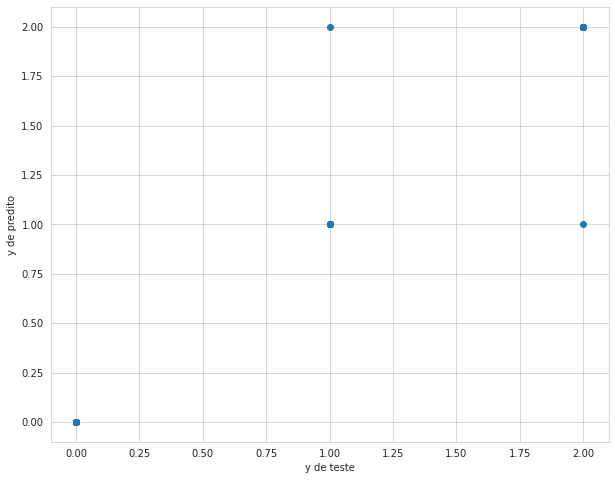

In [72]:
score = modelo.score(X_test, y_test)
y_predito = modelo.predict(X_test)
print(f'O score do modelo é {score}')
plt.scatter(x=y_test, y=y_predito)
plt.xlabel("y de teste")
plt.ylabel("y de predito")
plt.show()

### Métricas 

In [73]:
print(metrics.classification_report(y_test, y_predito))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      0.91      0.91        11
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



### Fronteira

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


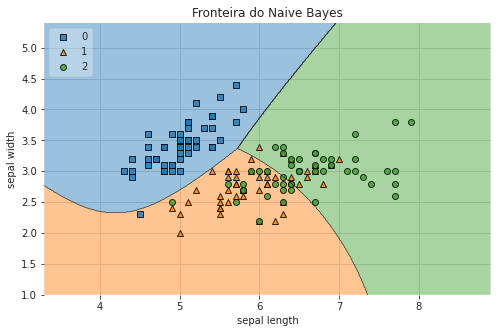

In [97]:
plot_fronteiras(df_iris.iloc[:, :2].values, df_iris.iloc[:, -1].values, 'sepal length', 'sepal width')

## Exemplo wine

###Dataset

In [33]:
wine = datasets.load_wine()
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [34]:
# Criando um df a partir da base carregada
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['class'] = wine.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### Explorando os dados



In [35]:
# informações gerais sobre os dados.
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

* Podemos concluir que não há dados nulos.
* Todas as colunas são numéricas, float64 ou int64
* Existem 178 ocorrências (ou linhas)
* Existem 14 colunas. Podemos intuir que são 13 features (caracteristicas) e 1 target (class).

In [36]:
# analisando algumas métricas estatísticas sobre os dados
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [37]:
# analisando as classes
df_wine['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

A quantidade de ocorrência por classe não é balanceda.

### Separando train test

In [45]:
# usaremos uma proporção de 80% para train e 20% para teste, indicadda em test_size=0.2
X = df_wine.iloc[:, :-1].values
y = df_wine.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TRAIN_TEST_SPLIT_SIZE, random_state=SEED_RANDOM)

print(f'Tamanhos do X de treino {X_train.shape}')
print(f'Tamanhos do y de treino {y_train.shape}')

print(f'Tamanhos do X de teste {X_test.shape}')
print(f'Tamanhos do y de teste {y_test.shape}')

Tamanhos do X de treino (142, 13)
Tamanhos do y de treino (142,)
Tamanhos do X de teste (36, 13)
Tamanhos do y de teste (36,)


### O modelo

In [47]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

###Predito

O score do modelo é 0.9722222222222222


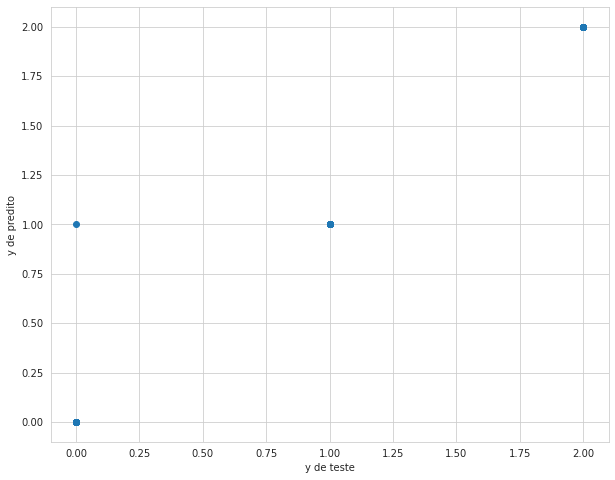

In [51]:
score = nb.score(X_test, y_test)
y_predito = nb.predict(X_test)
print(f'O score do modelo é {score}')
plt.scatter(x=y_test, y=y_predito)
plt.xlabel("y de teste")
plt.ylabel("y de predito")
plt.show()

### Métricas

In [52]:
print(metrics.classification_report(y_test, y_predito, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.91      0.95        11
     class_1       0.93      1.00      0.97        14
     class_2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



Nesse exemplo o Naive Bayes obteve um score de 0.97, ao passo que o KNN obteve no máximo um score de 0.80. Então para esse problema o Naive Bayes tem um resulto bem melhor.


### Analise de fronteira

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


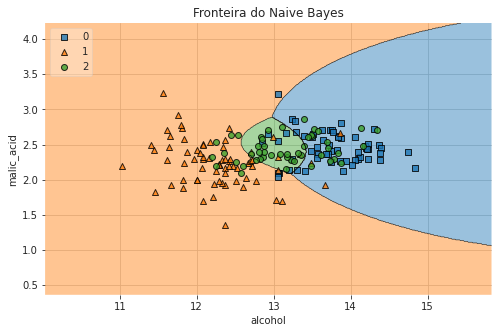

In [99]:
plot_fronteiras(wine.data[:,[0,2]], wine.target, 'alcohol', 'malic_acid')